In [44]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
import matplotlib.pyplot as plt

In [36]:
from keras import backend as K
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10 # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [37]:
# data: shuffled and split between train and test sets
 ( X_train, y_train), (X_test, y_test) = mnist.load_data()

In [38]:
# consider them as float and normalize
K.set_image_dim_ordering("th")
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')
# convert class vectors to binary class
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

(60000, 28, 28) train samples
(10000, 28, 28) test samples
(60000, 1, 28, 28) train samples
(10000, 1, 28, 28) test samples


In [39]:
classes=NB_CLASSES #no. of otpts
model=Sequential()
#keras.layers.convolutional.Conv2D(filters, kernel_size, padding='valid')
model.add(Conv2D(20, (5, 5), input_shape=INPUT_SHAPE, padding='valid'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2) ,strides=(2, 2) ))

model.add(Conv2D(50,kernel_size=5,padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(classes))
model.add(Activation("softmax"))
model.summary()    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 20, 24, 24)        520       
_________________________________________________________________
activation_11 (Activation)   (None, 20, 24, 24)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 20, 12, 12)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 12, 12)        25050     
_________________________________________________________________
activation_12 (Activation)   (None, 50, 12, 12)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 50, 6, 6)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1800)              0         
__________

In [40]:
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])
history = model.fit(X_train, y_train,batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE,\
                    validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 248s 5ms/step - loss: 0.2780 - acc: 0.9185 - val_loss: 0.0929 - val_acc: 0.9721
Epoch 2/20
48000/48000 [==============================] - 257s 5ms/step - loss: 0.0749 - acc: 0.9771 - val_loss: 0.0683 - val_acc: 0.9786
Epoch 3/20
48000/48000 [==============================] - 248s 5ms/step - loss: 0.0529 - acc: 0.9840 - val_loss: 0.0524 - val_acc: 0.9836
Epoch 4/20
48000/48000 [==============================] - 231s 5ms/step - loss: 0.0430 - acc: 0.9870 - val_loss: 0.0477 - val_acc: 0.9862
Epoch 5/20
48000/48000 [==============================] - 230s 5ms/step - loss: 0.0351 - acc: 0.9893 - val_loss: 0.0396 - val_acc: 0.9882
Epoch 6/20
48000/48000 [==============================] - 235s 5ms/step - loss: 0.0294 - acc: 0.9908 - val_loss: 0.0394 - val_acc: 0.9880
Epoch 7/20
48000/48000 [==============================] - 242s 5ms/step - loss: 0.0260 - acc: 0.9914 - val_loss: 0.0382 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


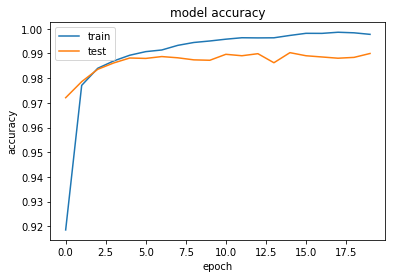

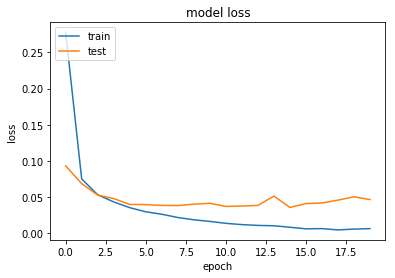

In [45]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

In [47]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [48]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2644s 16us/step


In [50]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples
